#Klasifikace 

Jako první se podíváme na úlohu **klasifikace**.

Co to vlastně je klasifikace? Jednoduše řečeno - rozdělení do tříd. 

Máme nějaký dataset objektů, v tomto případě to jsou jednokolky, kola, motorky, automobily a dodávky. Každý objekt je reprezentován vektorem [x,y], x = počet kol a y = hmotnost.

Na začátku máme k datasetu kde i informaci od učitele (člověka), která nám říká, do jaké třídy jednotlivé objekty datasetu zařadit. 

Jako první si natrénujeme klasifikátor - algoritmus, kterému poté předložíme nějaký neznámý objekt a ten ho následně klasifikuje do třídy.

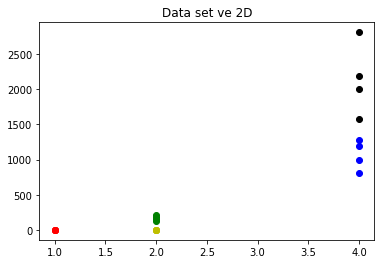

In [ ]:
#Import kihoven
import matplotlib.pyplot as plt

colors = ['ro', 'yo', 'go', 'bo', 'ko', 'mo']

#Dataset
Jednokolky = [[1,3],[1,1],[1,1.8],[1,2.4]]
Kola = [[2,3],[2,1.4],[2,2.1],[2,2.4]]
Motorky = [[2,130],[2,160],[2,180],[2,210]]
Automobily = [[4,1000],[4,810],[4,1280],[4,1190]]
Dodávky  = [[4,2000],[4,2810],[4,1580],[4,2190]]

data = [Jednokolky,Kola,Motorky,Automobily,Dodávky]

for i in range(0,len(data)):
    for j in data[i]:
      plt.plot(j[0],j[1],colors[i])
plt.title('Data set ve 2D')
plt.show()

Všiměte si červeného bodu v levém dolním rohu grafu. Vypadá to na jediný bod, ve skutečnosti je to však několik bodů, které se překrývají. Tady by měl datový analitky zbystřit zrak a zkusit jinou vizualizaci dat (třeba logaritmickou) Konec konců přece nechete přehlédnout celý trh s jednokolkami jen proto, že se tváří že je malý v datasetu.

Nyní máme natrénovaný klasifikátor a můžeme začít klasifikovat objekty u nichž neznáme třídu. 

Vyzkoušejme klasifikovat nějaký objekt. Tento objekt má 4 kola a váží  1118 Kg (bod [4,1118]) kam ho počítač klasifikuje? 

In [ ]:
from sklearn.naive_bayes import GaussianNB
#Numericko-matematická knihovna
import numpy as np
#Vytvoření modelu 
model = GaussianNB()

kategorie = ['Jednokolky','Kola','Motorky','Automobily','Dodávky']

#Nadefinujeme náš bod
#má 4 kola a váží 1118Kg
bod_ke_klasifikaci = np.array([[4,1118]])

classes = []

dataset = []

#Kod pro přetvoření do numpy array
for i in range(0,len(data)):
  for j in data[i]:
    classes.append(i)
    dataset.append(np.array(j))
  

model.fit(dataset,classes)
print('Model natrénován')

x = model.predict(bod_ke_klasifikaci)

print('Kategore', kategorie[x[0]])


Model natrénován
Kategore Jednokolky


Vyzkoušejte si libovolně měnit počet kol i hmotnost a pozorujte, kam bude bod klasifikovaný. 

#Rozdělení do tříd
Doposud jsme znali počet kategorií, kam klasifikujeme. Nyní s představme situaci, kdy nemáme v podstatě žádné informace o datasetu.

Zaměříme se na úlohu rozdělení datasetu do tříd, když ani neznáme počet tříd.

Jako první tedy musíme zjistit počet tříd. 

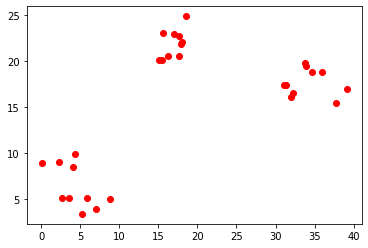

In [ ]:
dataset = [[4.3, 9.9], [17.9, 21.9], [31.1, 17.4], [2.6, 5.1], [18.0, 22.1], [39.1, 17.0], [0.1, 8.9], [16.2, 20.6], [35.9, 18.8], [7.0, 3.9], [17.6, 22.8], [32.0, 16.1], [2.3, 9.0], [15.5, 20.1], [31.3, 17.4], [3.6, 5.1], [17.0, 23.0], [37.7, 15.5], [4.1, 8.5], [15.1, 20.1], [33.8, 19.8], [5.2, 3.4], [18.5, 24.9], [33.9, 19.5], [5.9, 5.1], [17.6, 20.6], [32.2, 16.6], [8.8, 5.0], [15.6, 23.1], [34.7, 18.8]]

for i in dataset:
  plt.plot(i[0],i[1],'ro')


Z vykresleného grafu vidíme, že v datasetu máme pravděpodobně tři třídy. Takhle jednoduché to bohužel většinou není. Ve většině situací máme milióny dat ve stovkách dimenzí, které rozhodně nejsou takhle přehledné. 

Proto využijeme metodu shlukování. 


Pomocí algoritmu Kmeans, o kterém si povíme zas někdy jindy, rozdělíme dataset na X nejpodobnějších shluků.

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)
KMeans(algorithm='auto', copy_x=Tru

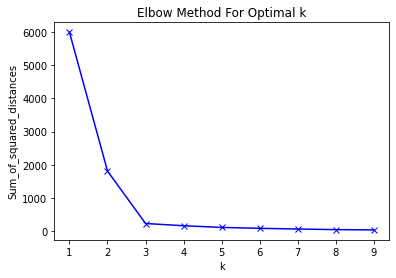

In [ ]:
np_dataset = np.array(dataset)

#Využíváme algoritmu Kmeans s tím že matematickou hatmatilkou dostáváme vzdálenosti ke středu shluku 
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

Sum_of_squared_distances = []
K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(np_dataset)
    print(km)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Tento graf nám říká, jak moc velké rozdíly jsou mezi jednotlivými shluky. Mezi shlukem 1 a 2 pozorujeme velký rozdíl, to zanamená, že to budou rozdílné třídy. To samé platí pro shluky 2 a 3. Naopak mezi shluky 3, 4, 5,..., 9 jsou rozdíly minimální. To znamená, že jsou ze stejné třídy. 

Tento graf můžeme vytvořit pro dataset s desítkami dimenzí.

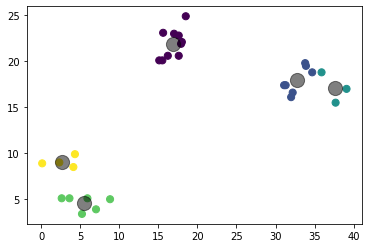

In [ ]:
#Teď je potřeba provést rozdělení do tříd využijeme opět algoritmus Kmenas
#Zde můžete experimentovat
pocet_shluku = 5

km = KMeans(n_clusters=pocet_shluku)
km = km.fit(np_dataset)
y_kmeans = km.predict(np_dataset)


plt.scatter(np_dataset[:, 0], np_dataset[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

V grafu vidíme barevně oddělené jednotlivé shluky. 

Co jsou ty šedé tečky? To jsou středy našich shluků. V podstatě nám to říkají,  jak by měl vypadat průměrný bod shluku. Tento průměrný bod si můžeme představt jako např. průměrné parametry produktu v dané kategorii. 

Uvědomte si rozdíl mezi klasifikací a třízením do tříd.  

#Predikce
Poslední úloha na kterou se zaměříme je predikce.

Představme si, že chceme vědět kolik se v následujícím období prodá zmrzliny. Použijeme data z prodejů za minulé období a počet dětí ve městě a necháme to vše uvařit pomocí AI. (Přiznám se, že tady budeme trošku podvádět a k učení využejeme jen kalasickou regresi.)

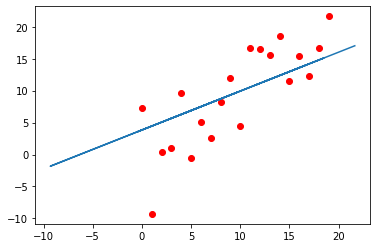

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


dataset = [7.310539685224871, -9.30070354748827, 0.38791397993246246, 1.0797282266579218, 9.668847211677187, -0.4994563365701543, 5.1378589622478215, 2.610707910393141, 8.211068733577964, 11.91407606857911, 4.496904113935393, 16.723618549198072, 16.50795360296398, 15.51247169450934, 18.50427974632206, 11.581360704128334, 15.385548872406758, 12.321152828704657, 16.66055960186992, 21.65177733369093]

x = np.array(dataset)
y = np.array(list(range(0, 20)))
m, b = np.polyfit(x, y, 1)


plt.plot(dataset,'ro')
plt.plot(x, m*x + b)